# CAR PRICE PREDICTION IN MACHINE LEARNING

## import all required libraries

In [ ]:
import pandas as pd
import re
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

## load data

In [ ]:
df=pd.read_csv('Car_Details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.shape

(8128, 13)

In [ ]:
df[['mileage','Mileage_units']]=df['mileage'].str.split(' ',expand=True)
df[['engine','engine_units']]=df['engine'].str.split(' ',expand=True)
df[['max_power','power_units']]=df['max_power'].str.split(' ',expand=True)

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Mileage_units,engine_units,power_units
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,kmpl,CC,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,kmpl,CC,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,kmpl,CC,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,kmpl,CC,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,kmpl,CC,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0,kmpl,CC,bhp
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0,kmpl,CC,bhp
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,190Nm@ 2000rpm,5.0,kmpl,CC,bhp
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,140Nm@ 1800-3000rpm,5.0,kmpl,CC,bhp


In [ ]:
df.drop(columns=['Mileage_units','engine_units','power_units','torque'],inplace=True)

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0


## perform EDA(exploratory data analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [ ]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [ ]:
df.shape

(7907, 12)

In [ ]:
df['seats']=df['seats'].astype('int')

In [ ]:
df.seats.info

<bound method Series.info of 0       5
1       5
2       5
3       5
4       5
       ..
8123    5
8124    5
8125    5
8126    5
8127    5
Name: seats, Length: 7907, dtype: int32>

In [ ]:
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df.dropna(subset=['mileage'], inplace=True)
df['mileage'] = df['mileage'].round().astype(int)

In [ ]:
df.mileage.info

<bound method Series.info of 0       23
1       21
2       18
3       23
4       16
        ..
8123    18
8124    17
8125    19
8126    24
8127    24
Name: mileage, Length: 7907, dtype: int32>

In [ ]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df.dropna(subset=['max_power'], inplace=True)
df['max_power'] = df['max_power'].round().astype(int)

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18,1197,83,5
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1493,110,5
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19,1248,74,5
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,24,1396,70,5


In [ ]:
df.duplicated().sum()

1189

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5


In [ ]:
df.describe()

,year,selling_price,km_driven,mileage,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.428282,91.594359,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.019243,35.770206,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,33.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,17.000000,68.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,400.000000,14.000000


In [ ]:
df['name'].mode()    #most selling car

0    Maruti Swift Dzire VDI
Name: name, dtype: object

In [ ]:
df['selling_price'].max()

10000000

In [ ]:
df[df['selling_price']==10000000]    #most expensive car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42,1969,400,4


In [ ]:
df['km_driven'].argmin()

7695

In [ ]:
df.loc[7913]       #least driven car

name             Maruti Eeco 5 STR With AC Plus HTR CNG
year                                               2011
selling_price                                    209000
km_driven                                             1
fuel                                                CNG
seller_type                                  Individual
transmission                                     Manual
owner                              Fourth & Above Owner
mileage                                              15
engine                                             1196
max_power                                            73
seats                                                 5
Name: 7913, dtype: object

In [ ]:
df.corr(numeric_only=True)

,year,selling_price,km_driven,mileage,max_power,seats
year,1.000000,0.412302,-0.428548,0.326891,0.226779,-0.007923
selling_price,0.412302,1.000000,-0.222158,-0.126579,0.749563,0.041617
km_driven,-0.428548,-0.222158,1.000000,-0.172206,-0.038094,0.227259
mileage,0.326891,-0.126579,-0.172206,1.000000,-0.377289,-0.451696
max_power,0.226779,0.749563,-0.038094,-0.377289,1.000000,0.192031
seats,-0.007923,0.041617,0.227259,-0.451696,0.192031,1.000000


In [ ]:
df['name'].unique()    #all available car models

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [ ]:
df['name'].value_counts().head(60)   # no. of available car models

name
Maruti Swift Dzire VDI                      129
Maruti Alto 800 LXI                          82
Maruti Alto LXi                              71
BMW X4 M Sport X xDrive20d                   62
Maruti Swift VDI                             61
Maruti Wagon R LXI                           53
Maruti Alto K10 VXI                          50
Hyundai EON Era Plus                         48
Maruti Ertiga VDI                            45
Maruti Wagon R VXI BS IV                     45
Maruti Alto LX                               44
Toyota Innova 2.5 VX (Diesel) 7 Seater       44
Maruti Ritz VDi                              42
Maruti Swift Dzire VXI                       38
Tata Safari Storme EX                        38
Maruti 800 AC                                38
Maruti Baleno Alpha 1.3                      37
Maruti Swift VDI BSIV                        36
Hyundai Grand i10 1.2 CRDi Sportz            34
Jaguar XF 2.0 Diesel Portfolio               34
Lexus ES 300h                      

In [ ]:
df[(df['name']=='Maruti Swift Dzire VDI')&(df['km_driven']<=15000)]   #filtering desired car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
510,Maruti Swift Dzire VDI,2018,755000,15000,Diesel,Individual,Manual,First Owner,28,1248,74,5
5292,Maruti Swift Dzire VDI,2019,754000,10000,Diesel,Individual,Manual,First Owner,28,1248,74,5
5295,Maruti Swift Dzire VDI,2018,725000,15000,Diesel,Individual,Manual,First Owner,28,1248,74,5


In [ ]:
x= datetime.datetime.now() # find today's date for check that how much car is old 
x.year

2025

In [ ]:
x=df.drop(columns=['selling_price'])

In [ ]:
x

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18,1197,83,5
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1493,110,5
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19,1248,74,5
8126,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,24,1396,70,5


In [ ]:
df1=pd.DataFrame(data=x)
df1

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18,1197,83,5
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1493,110,5
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19,1248,74,5
8126,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,24,1396,70,5


In [ ]:
y=df['selling_price']
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

In [ ]:
df2=pd.DataFrame(data=y)
df2

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [ ]:
df3=pd.concat([df1,df2],axis=1)
df3

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5,130000
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18,1197,83,5,320000
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1493,110,5,135000
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19,1248,74,5,382000
8126,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,24,1396,70,5,290000


In [ ]:
d=pd.melt(df2)
d

,variable,value
0,selling_price,450000
1,selling_price,370000
2,selling_price,158000
3,selling_price,225000
4,selling_price,130000
...,...,...
7901,selling_price,320000
7902,selling_price,135000
7903,selling_price,382000
7904,selling_price,290000


In [ ]:
pivot_df=df.pivot_table(index='name',columns='fuel',values='seats',aggfunc='mean')
pivot_df

fuel,CNG,Diesel,LPG,Petrol
name,,,,
Ambassador CLASSIC 1500 DSL AC,NaN,5.0,NaN,NaN
Ambassador Classic 2000 DSZ AC PS,NaN,5.0,NaN,NaN
Ambassador Grand 1500 DSZ BSIII,NaN,5.0,NaN,NaN
Ambassador Grand 2000 DSZ PW CL,NaN,5.0,NaN,NaN
Ashok Leyland Stile LE,NaN,8.0,NaN,NaN
...,...,...,...,...
Volvo V40 D3 R-Design,NaN,5.0,NaN,NaN
Volvo XC40 D4 Inscription BSIV,NaN,5.0,NaN,NaN
Volvo XC40 D4 R-Design,NaN,5.0,NaN,NaN


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [ ]:
num_feature=[fea for fea in df.columns if df[fea].dtype!=object]
cat_feature=[fea for fea in df.columns if df[fea].dtype==object]

In [ ]:
num_feature

['year', 'selling_price', 'km_driven', 'mileage', 'max_power', 'seats']

In [ ]:
cat_feature

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'engine']

In [ ]:
print("we have {} numerical features : {}".format(len(num_feature),num_feature))
print("we have {} categorial features : {}".format(len(cat_feature),cat_feature))

we have 6 numerical features : ['year', 'selling_price', 'km_driven', 'mileage', 'max_power', 'seats']
we have 6 categorial features : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'engine']


# visualize data

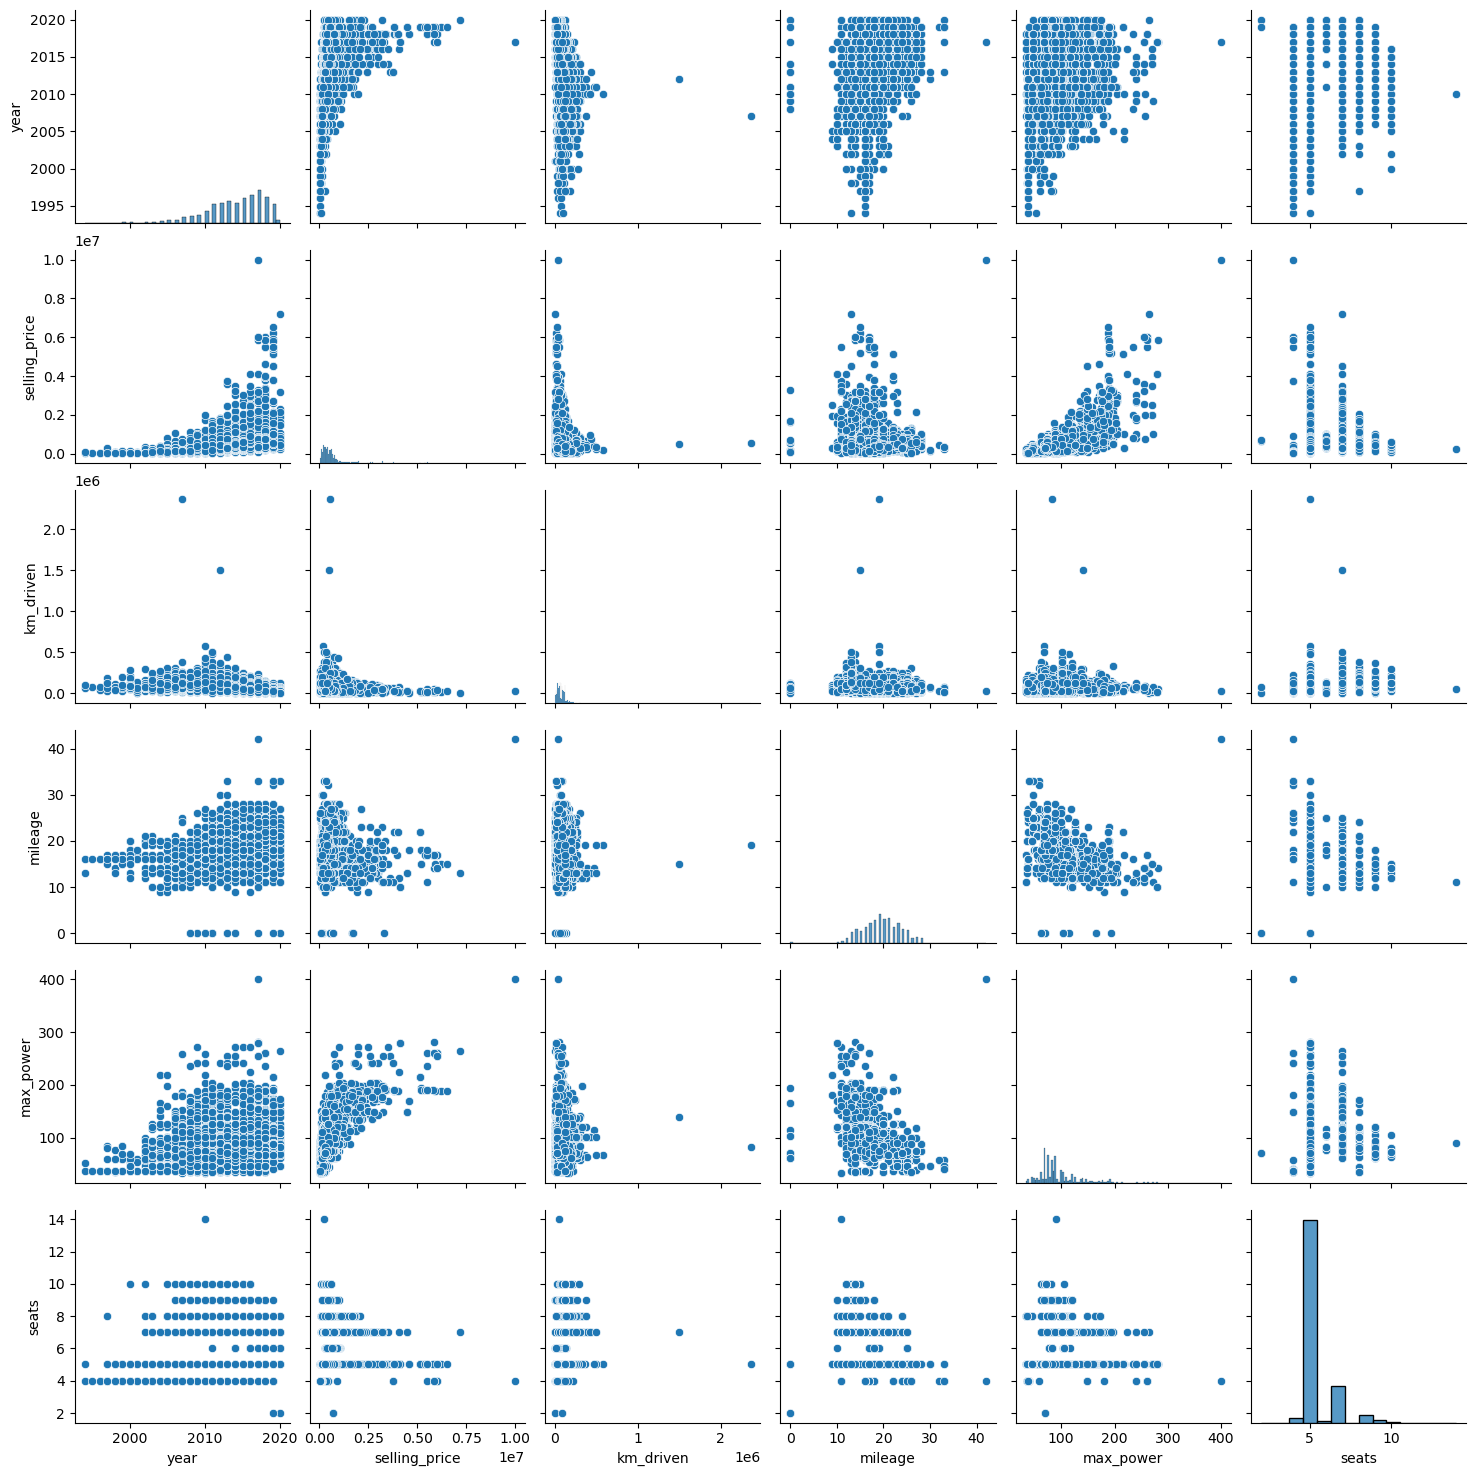

In [ ]:
sns.pairplot(df)

## visualize the correlation using heatmap

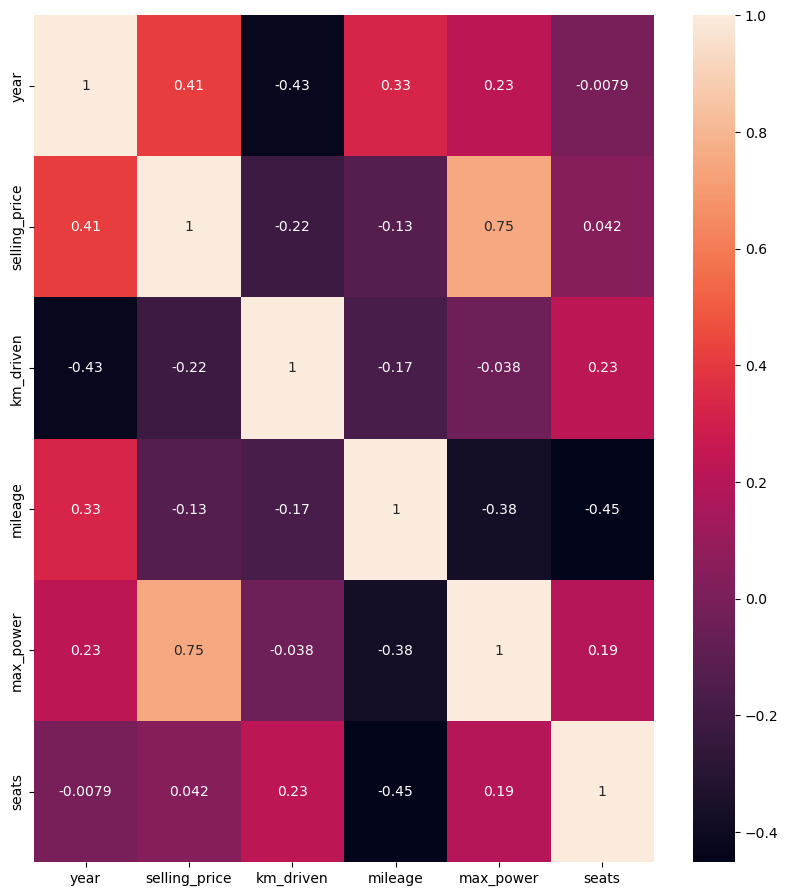

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.savefig("28_july.png")

# univariate analysis

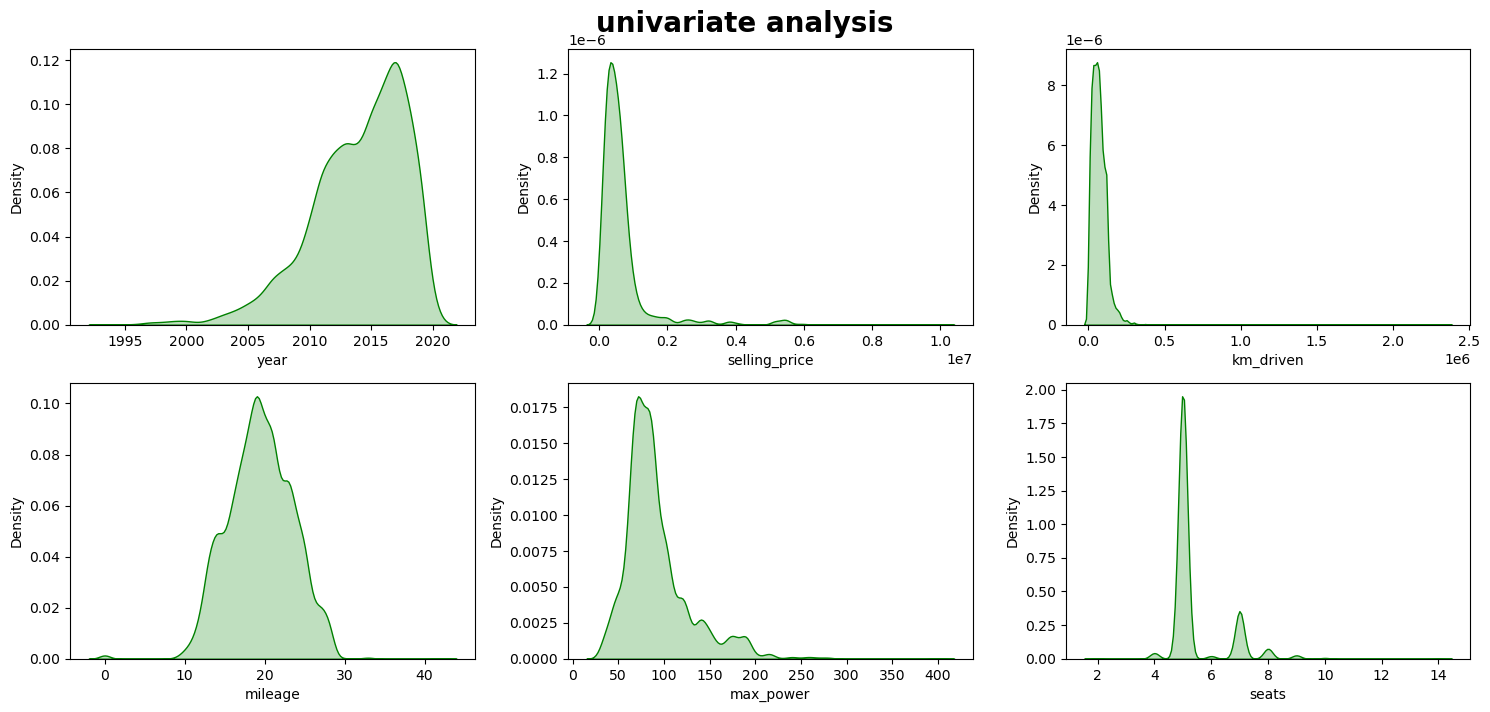

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,17))
plt.suptitle('univariate analysis',fontsize=20,fontweight='bold')
for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],fill=True,color='g') #kernel density estimator(kdeplot)
    plt.xlabel(num_feature[i])
    plt.tight_layout()

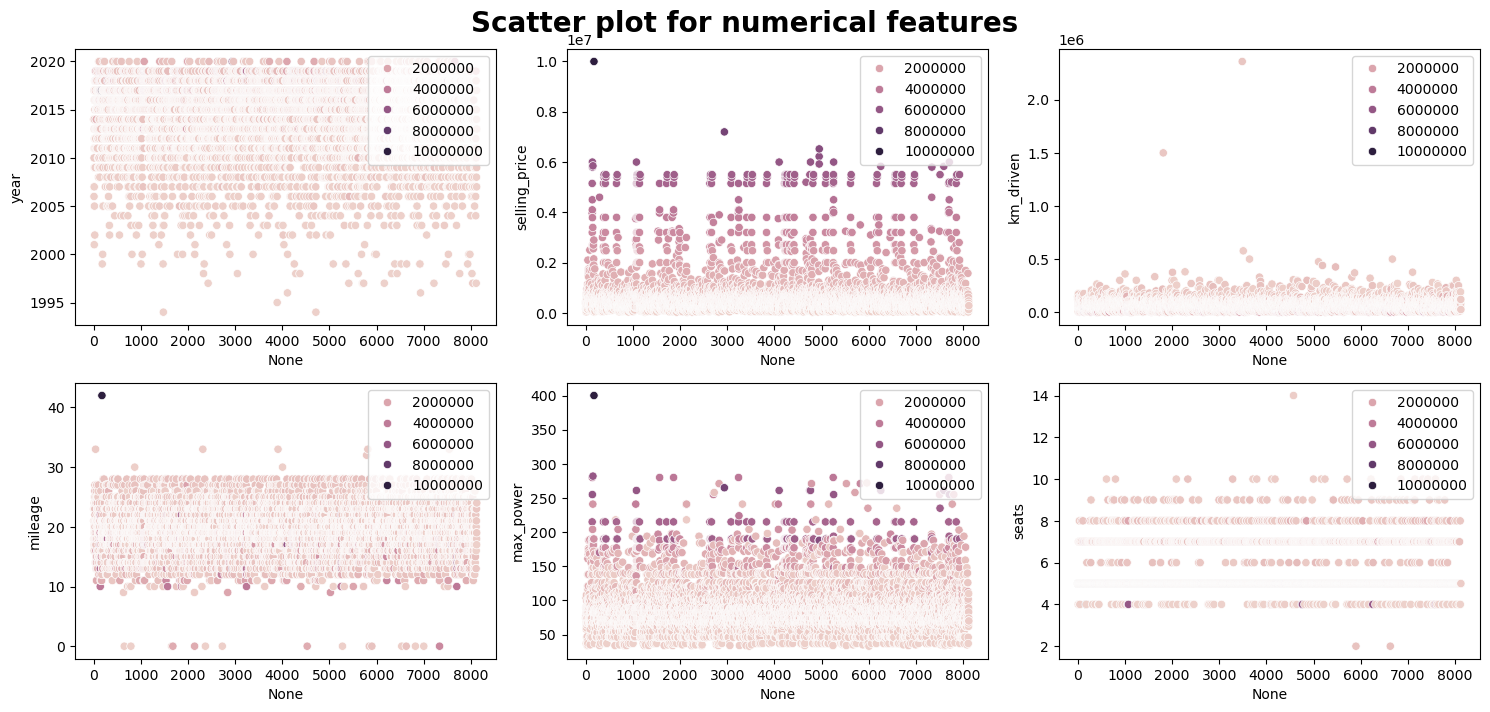

In [ ]:
plt.figure(figsize=(15,17))
plt.suptitle('Scatter plot for numerical features',fontsize=20,fontweight='bold')
for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=num_feature[i],x=df.index,data=df,color='b',hue='selling_price')
    plt.legend(loc="upper right")
    plt.tight_layout()

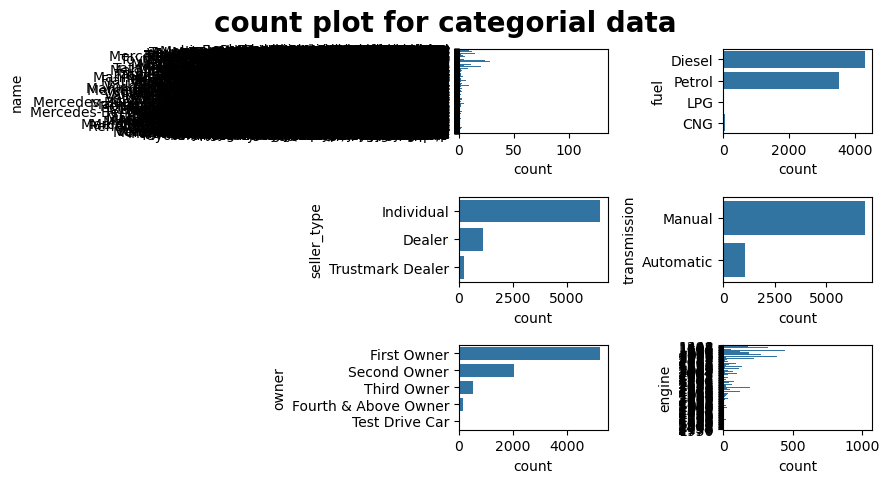

In [ ]:
 plt.figure(figsize=(9,12))
plt.suptitle('count plot for categorial data',fontsize=20,fontweight='bold')
for i in range(0,len(cat_feature)):
    plt.subplot(8,2,i+1)
    sns.countplot(y=cat_feature[i],data=df) 
    plt.tight_layout()

## bivariate analysis

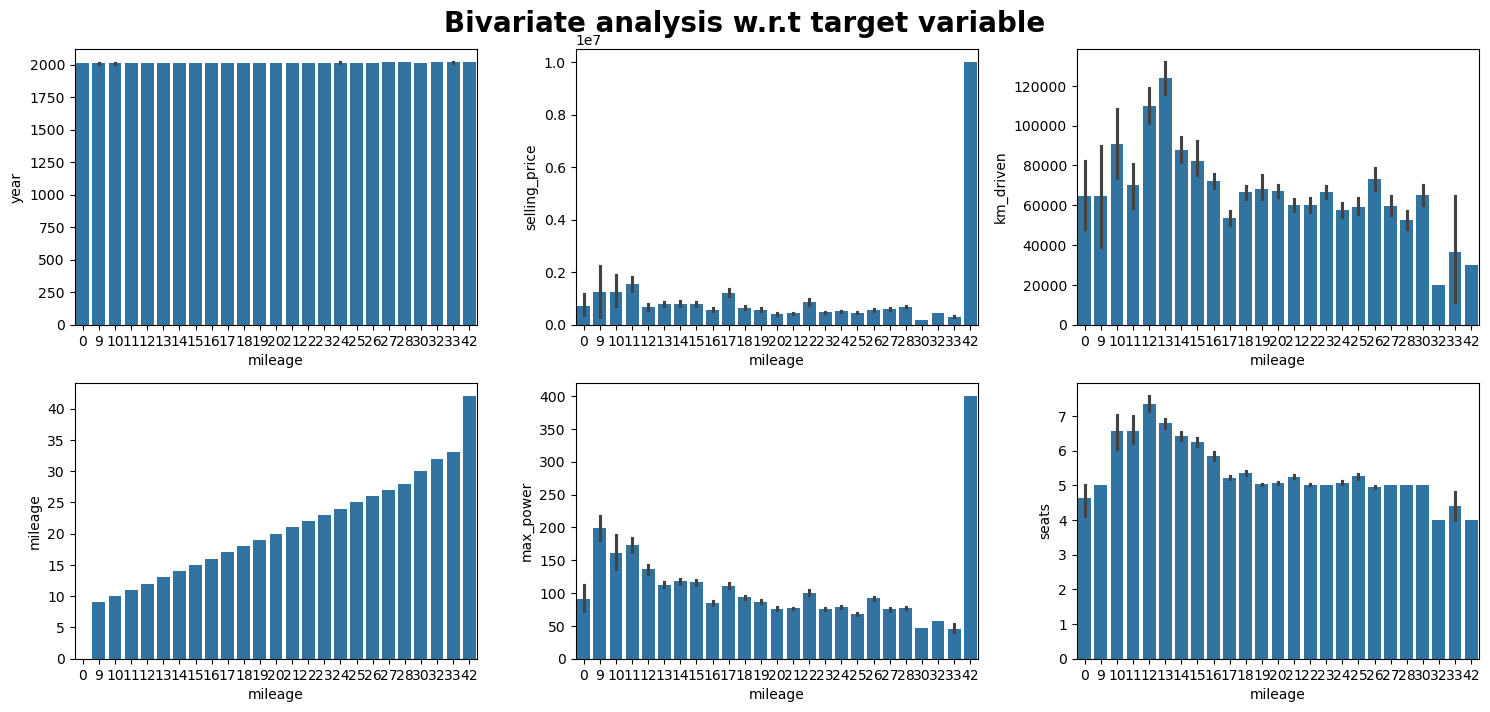

In [ ]:
plt.figure(figsize=(15,17))
plt.suptitle('Bivariate analysis w.r.t target variable',fontsize=20,fontweight='bold')
for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=num_feature[i],data=df,x='mileage') 
    plt.tight_layout()

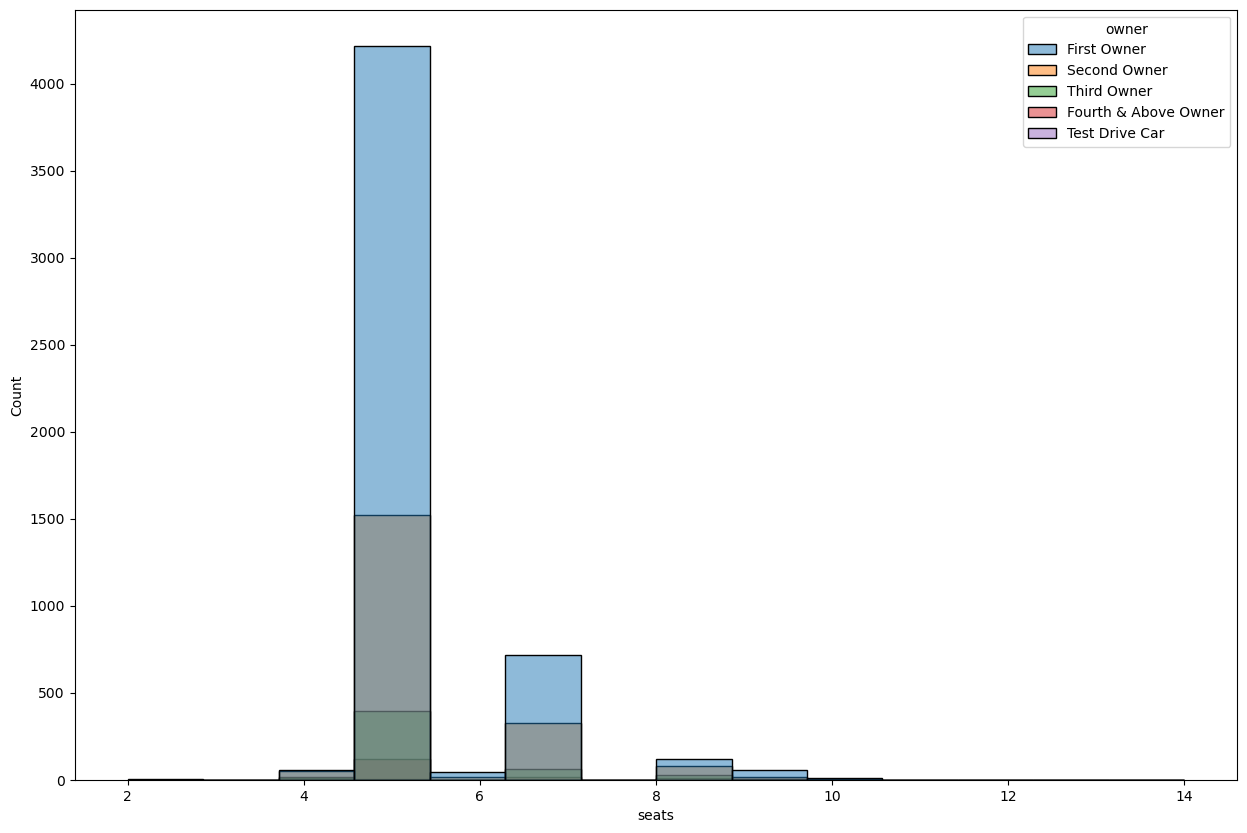

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x='seats',hue='owner',data=df)
plt.show()

In [ ]:
np.median(df['selling_price'])

450000.0

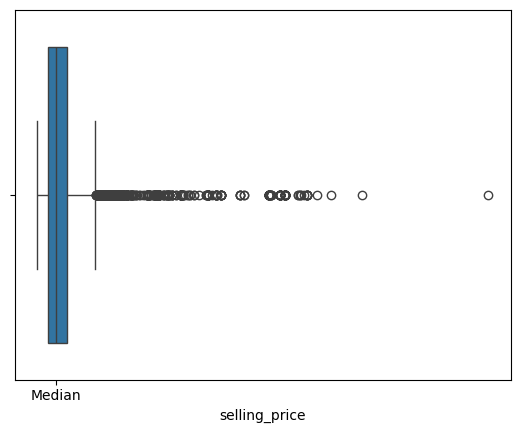

In [ ]:
sns.boxplot(x='selling_price',data=df)
locations=[450000.0]
label=['Median']
plt.xticks(locations,label)    
plt.show()

In [ ]:
df.drop(columns=['name'],inplace=True)

In [ ]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18,1197,83,5
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1493,110,5
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19,1248,74,5
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,24,1396,70,5


# matplotlib

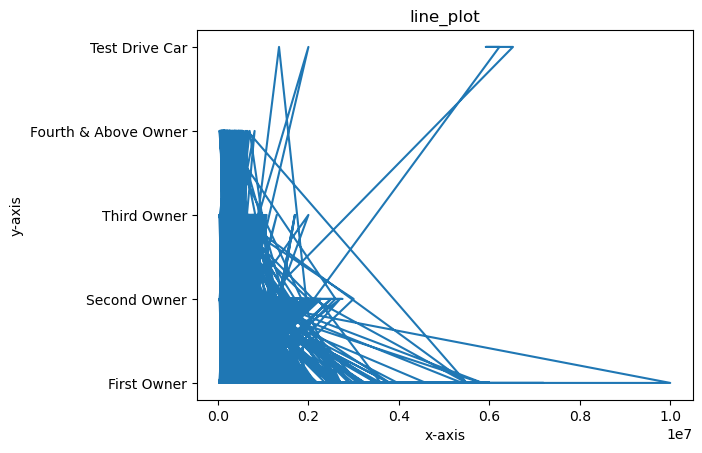

In [ ]:
x=df['selling_price']
y=df['owner']
plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('line_plot')
plt.show()

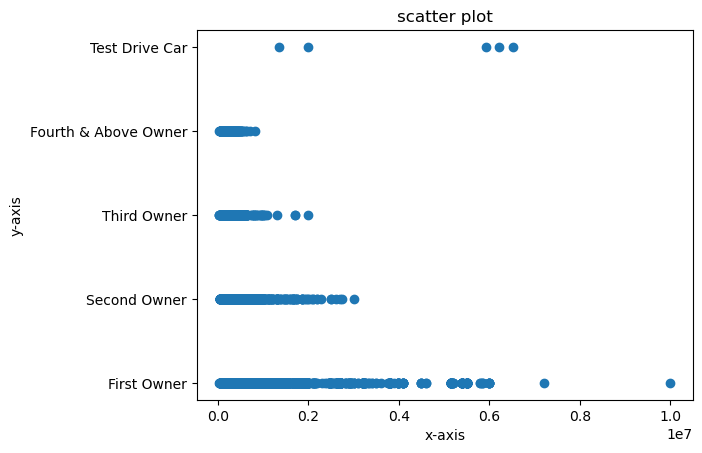

In [ ]:
x =df['selling_price']
y =df['owner']
plt.scatter(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('scatter plot')
plt.show()

# seaborn

<Axes: xlabel='fuel', ylabel='km_driven'>

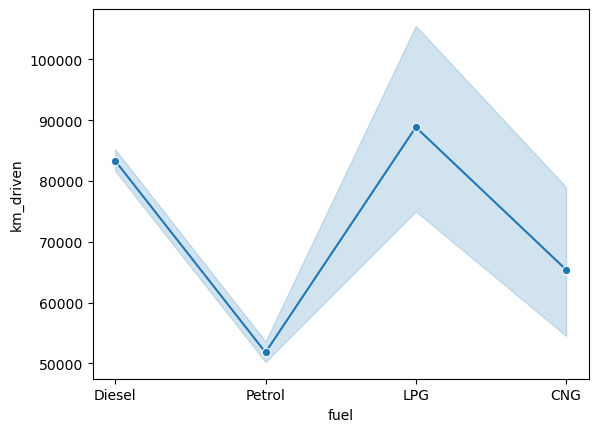

In [ ]:
sns.lineplot(x='fuel',y='km_driven',data=df,marker='o')

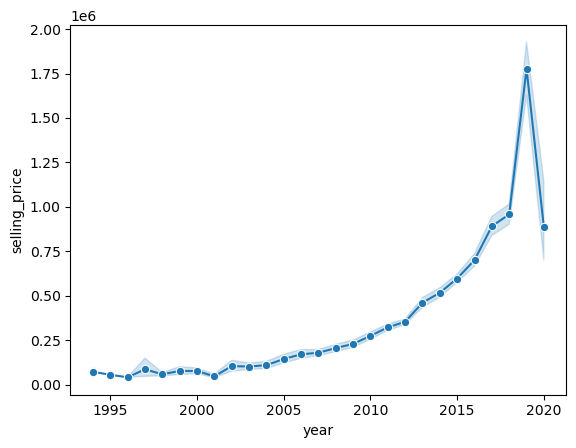

In [ ]:
sns.lineplot(x='year',y='selling_price',data=df,marker='o')
plt.show()

# in seaborn , we if we want to remove the legend we use attribute legend=False
there are many more types of legends are there like: 'auto','brief','full' or a 'boolean'

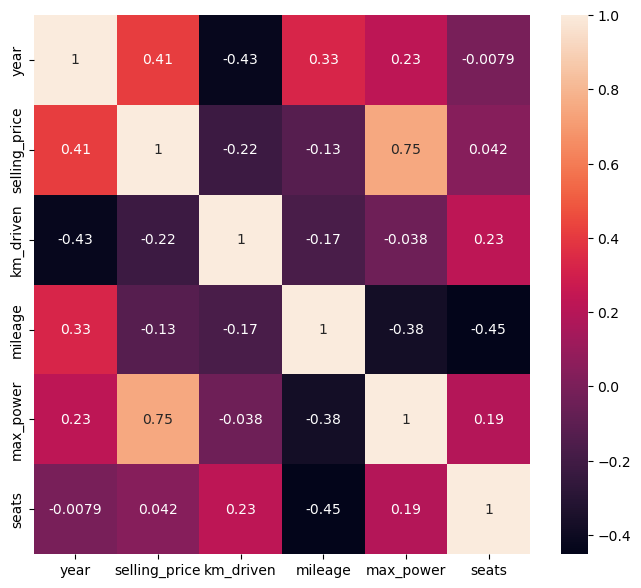

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

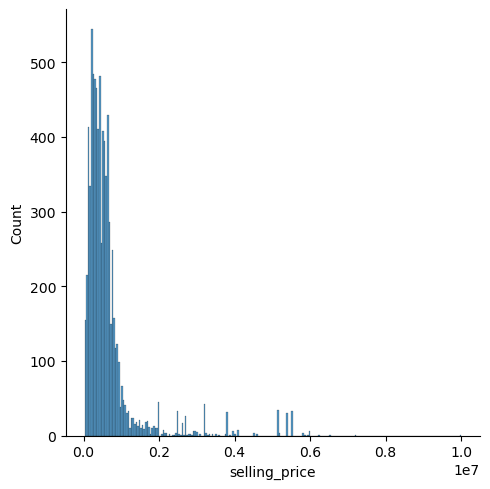

In [ ]:
sns.displot(df['selling_price'])
plt.show() 

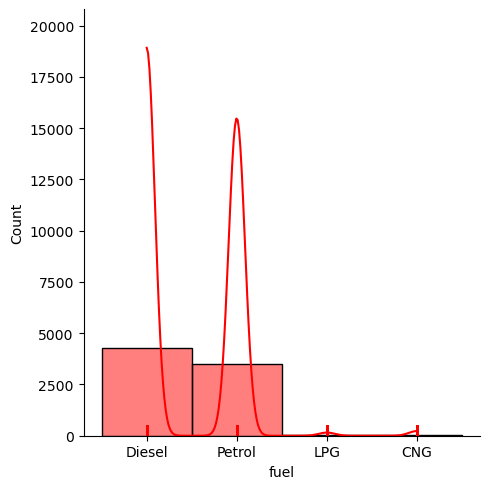

In [ ]:
sns.displot(df['fuel'],kde=True,rug=True,color='red') #kernel density 
plt.show()

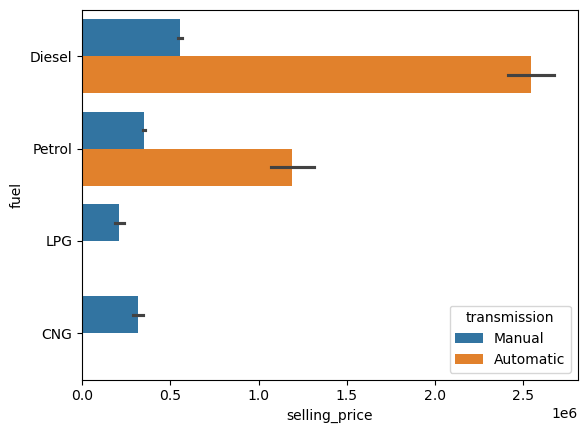

In [ ]:
sns.barplot(x='selling_price',y='fuel',data=df,hue="transmission")
plt.show()

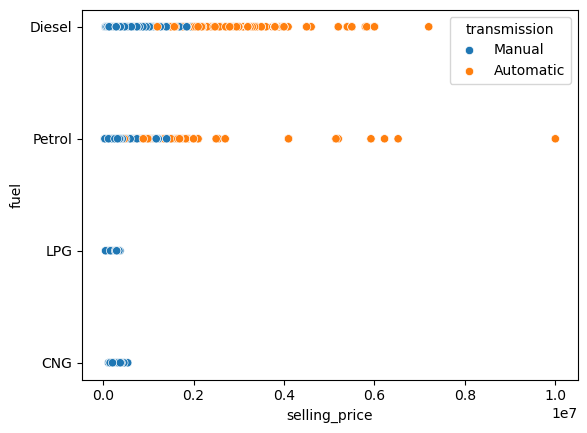

In [ ]:
sns.scatterplot(x='selling_price',y='fuel',data=df,hue="transmission")
plt.show()

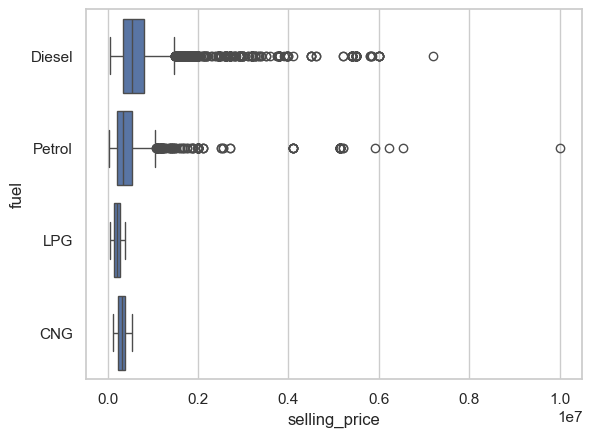

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x='selling_price',y='fuel',data=df)
plt.show()

# label encoding

In [ ]:
x1=df.drop(columns=['selling_price'])

In [ ]:
x1

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21,1498,104,5
2,2006,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5
3,2010,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5
4,2007,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,Petrol,Individual,Manual,First Owner,18,1197,83,5
8124,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1493,110,5
8125,2009,120000,Diesel,Individual,Manual,First Owner,19,1248,74,5
8126,2013,25000,Diesel,Individual,Manual,First Owner,24,1396,70,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x1['fuel']=label_encoder.fit_transform(x1['fuel'])
x1

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,Individual,Manual,First Owner,23,1248,74,5
1,2014,120000,1,Individual,Manual,Second Owner,21,1498,104,5
2,2006,140000,3,Individual,Manual,Third Owner,18,1497,78,5
3,2010,127000,1,Individual,Manual,First Owner,23,1396,90,5
4,2007,120000,3,Individual,Manual,First Owner,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,Individual,Manual,First Owner,18,1197,83,5
8124,2007,119000,1,Individual,Manual,Fourth & Above Owner,17,1493,110,5
8125,2009,120000,1,Individual,Manual,First Owner,19,1248,74,5
8126,2013,25000,1,Individual,Manual,First Owner,24,1396,70,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x1['owner']=label_encoder.fit_transform(x1['owner'])
x1

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,Individual,Manual,0,23,1248,74,5
1,2014,120000,1,Individual,Manual,2,21,1498,104,5
2,2006,140000,3,Individual,Manual,4,18,1497,78,5
3,2010,127000,1,Individual,Manual,0,23,1396,90,5
4,2007,120000,3,Individual,Manual,0,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,Individual,Manual,0,18,1197,83,5
8124,2007,119000,1,Individual,Manual,1,17,1493,110,5
8125,2009,120000,1,Individual,Manual,0,19,1248,74,5
8126,2013,25000,1,Individual,Manual,0,24,1396,70,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x1['seller_type']=label_encoder.fit_transform(x1['seller_type'])
x1

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,1,Manual,0,23,1248,74,5
1,2014,120000,1,1,Manual,2,21,1498,104,5
2,2006,140000,3,1,Manual,4,18,1497,78,5
3,2010,127000,1,1,Manual,0,23,1396,90,5
4,2007,120000,3,1,Manual,0,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,Manual,0,18,1197,83,5
8124,2007,119000,1,1,Manual,1,17,1493,110,5
8125,2009,120000,1,1,Manual,0,19,1248,74,5
8126,2013,25000,1,1,Manual,0,24,1396,70,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x1['transmission']=label_encoder.fit_transform(x1['transmission'])
x1

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,1,1,0,23,1248,74,5
1,2014,120000,1,1,1,2,21,1498,104,5
2,2006,140000,3,1,1,4,18,1497,78,5
3,2010,127000,1,1,1,0,23,1396,90,5
4,2007,120000,3,1,1,0,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,0,18,1197,83,5
8124,2007,119000,1,1,1,1,17,1493,110,5
8125,2009,120000,1,1,1,0,19,1248,74,5
8126,2013,25000,1,1,1,0,24,1396,70,5


# standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_data=scaler.fit_transform(x1)
scaler_data

array([[ 0.00415788,  1.34377674, -0.88705803, ..., -0.41818825,
        -0.49190299, -0.4341278 ],
       [ 0.00415788,  0.89474378, -0.88705803, ...,  0.07798015,
         0.34683686, -0.4341278 ],
       [-2.06652972,  1.24692649,  1.11011719, ...,  0.07599548,
        -0.38007101, -0.4341278 ],
       ...,
       [-1.29002187,  0.89474378, -0.88705803, ..., -0.41818825,
        -0.49190299, -0.4341278 ],
       [-0.25467807, -0.7781241 , -0.88705803, ..., -0.12445656,
        -0.60373497, -0.4341278 ],
       [-0.25467807, -0.7781241 , -0.88705803, ..., -0.12445656,
        -0.60373497, -0.4341278 ]])

In [ ]:
np.mean(scaler_data)

2.6353711915878345e-15

In [ ]:
np.std(scaler_data)

1.0

# training and testing

## divide data into dependent and independent features

In [ ]:
x=x1
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,1,1,0,23,1248,74,5
1,2014,120000,1,1,1,2,21,1498,104,5
2,2006,140000,3,1,1,4,18,1497,78,5
3,2010,127000,1,1,1,0,23,1396,90,5
4,2007,120000,3,1,1,0,16,1298,88,5
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,0,18,1197,83,5
8124,2007,119000,1,1,1,1,17,1493,110,5
8125,2009,120000,1,1,1,0,19,1248,74,5
8126,2013,25000,1,1,1,0,24,1396,70,5


In [ ]:
y=df[['selling_price']]
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


## split data into training and testing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,random_state=42)

In [ ]:
y.shape

(7906, 1)

In [ ]:
x_train.shape

(6324, 10)

In [ ]:
x_test.shape

(1582, 10)

In [ ]:
y_train.shape

(6324, 1)

In [ ]:
x_train.sample(5)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3172,2008,78000,1,0,1,0,15,1997,120,7
1713,2019,20000,1,1,0,0,18,1969,190,5
5582,2014,141000,1,1,1,2,15,2179,140,7
5785,2007,120000,1,1,1,2,19,1896,66,5
1462,2011,60000,1,1,1,2,21,1248,74,5


# supervised learning

# linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
ypred=reg.predict(x_test)
ypred

array([[ 625129.81699557],
       [ 434688.79797791],
       [  81184.51882681],
       ...,
       [ 196421.60634869],
       [2529304.87960508],
       [ 625190.00123654]])

In [ ]:
reg.coef_ 

array([[ 3.23858512e+04, -1.43990950e+00, -3.10328358e+04,
        -2.06161468e+05, -4.75395682e+05, -1.28073825e+04,
         1.09526992e+04,  9.19895117e+01,  1.23898770e+04,
        -3.25724758e+04]])

In [ ]:
reg.intercept_ 

array([-65116335.69177681])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, ypred)
mse

212711628556.37973

In [ ]:
y_test.shape

(1582, 1)

In [ ]:
ypred.shape

(1582, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train2=scaler.fit_transform(x_train)
x_test2=scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train2, y_train)
ypred1=reg.predict(x_test2)
ypred1

array([[ 626633.78187935],
       [ 461801.63341304],
       [ 131651.0986244 ],
       ...,
       [ 188709.10733539],
       [2518654.50244119],
       [ 618720.9565962 ]])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, ypred1)
mse

209812348778.61816

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
ypred_DT=model.predict(x_test)
ypred_DT

array([ 650000.        ,  536666.66666667,  135000.        , ...,
        170000.        , 2678750.        ,  500000.        ])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, ypred_DT)
mse

23409669403.5721

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, ypred_DT)
mae

77507.66756215761

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test, ypred_DT)
rmse

153002.187577734

# knn (k-nearest neighbour) 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
ypred_knn=model.predict(x_test)
ypred_knn

array([[ 419200. ],
       [ 545000. ],
       [ 541000. ],
       ...,
       [ 140600. ],
       [2676600. ],
       [ 399199.8]])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, ypred_knn)
mse

125939399665.66502

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, ypred_knn)
mae

167259.43008849557

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test, ypred_knn)
rmse

354879.41566913266

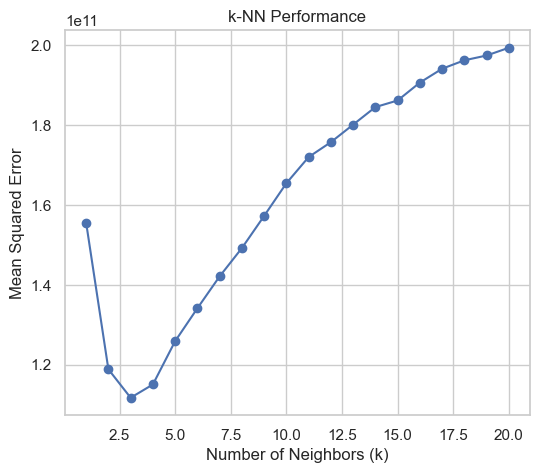

In [ ]:
k_values = list(range(1, 21))  # k from 1 to 20
errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)
plt.figure(figsize=(6, 5))
plt.plot(k_values, errors, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('k-NN Performance')
plt.grid(True)
plt.show()

# random forest regressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

C:\Users\Kashish Kharb\New folder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ 554798.24333333,  542528.25396825,  159599.94      , ...,
        213059.83      , 2678422.44490267,  588230.        ])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 12761694229.313732
R^2 Score: 0.9816453250185777


# actual vs predicted data

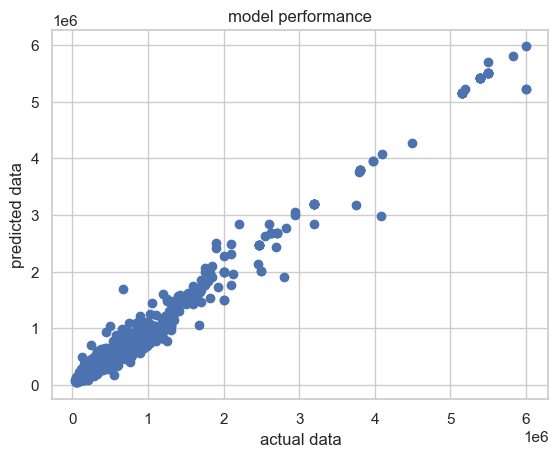

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.title('model performance')
plt.show()

In [ ]:
pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,501000.0,5.547982e+05
1,440000.0,5.425283e+05
2,140000.0,1.595999e+05
3,476999.0,3.634100e+05
4,620000.0,6.157107e+05
...,...,...
1577,330000.0,3.666100e+05
1578,229999.0,2.485994e+05
1579,144000.0,2.130598e+05
1580,2711000.0,2.678422e+06


# deep learning

In [ ]:
import tensorflow 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore"
                       )

In [ ]:
model = Sequential([
    Dense(32, input_dim=10, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
print(type(x_train), x_train.dtype, x_train.shape)
print(type(y_train), y_train.dtype, y_train.shape)

<class 'numpy.ndarray'> float32 (6324, 10)
<class 'numpy.ndarray'> float32 (6324, 1)


In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 992116277248.0000 - mse: 992116277248.0000
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 819730513920.0000 - mse: 819730513920.0000
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 915792330752.0000 - mse: 915792330752.0000
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 954772881408.0000 - mse: 954772881408.0000
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 854575808512.0000 - mse: 854575808512.0000
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 759882645504.0000 - mse: 759882645504.0000
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 752797876224.0000 - mse: 752797876224.0000
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 688573186048.0000 - mse: 688573186048.0000
Epoch 9/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 629443461120.0000 - mse: 629443461120.0000
Epoch 10/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 599137648640

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

In [ ]:
import netron

In [ ]:
model.save('car.h5')

In [ ]:
model1='car.h5'

In [ ]:
netron.start(model1)

Serving 'car.h5' at http://localhost:8080


('localhost', 8080)

In [ ]:
import pickle  # ← Add this if not already present

# Save the trained model to a file
with open('car_model.pkl', 'wb') as f: 
    pickle.dump(model, f)
